# Intro to Data Visualization with Python

## Contents

1. Importing data and libraries
    - including visualization libraries: matplotlib, seaborn, and scipy
2. Creating bar charts
    - sort_index
    - adding color
3. Exporting Charts
4. Creating Histograms
    - bins
5. Creating Scatterplots with seaborn
    - identifying outliers (moved data cleaning to 4.8.2)
6. Creating Line Charts
    - sampling data
    - seeds allow reproducibility with randomness
    - 80/20 or 70/30
    - line chart uncertainty

### 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting path to Achievement 4 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'

In [3]:
# Import dataframe ords_prods_merge_48.pkl as ords_prods_merge

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_48.pkl'))

In [6]:
# Checking import shape and head
ords_prods_merge.shape

(32404859, 23)

In [5]:
ords_prods_merge.head(10)

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prod_price,spending_type,ordering_behavior,frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,9.0,Mid range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,9.0,Mid range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,9.0,Mid range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
5,3367565,1,6,2,7,19.0,False,196,1,1,...,9.0,Mid range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
6,550135,1,7,1,9,20.0,False,196,1,1,...,9.0,Mid range product,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
7,3108588,1,8,1,14,14.0,False,196,2,1,...,9.0,Mid range product,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
8,2295261,1,9,1,16,0.0,False,196,4,1,...,9.0,Mid range product,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer
9,2550362,1,10,4,8,30.0,False,196,1,1,...,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent_customer


### 2. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

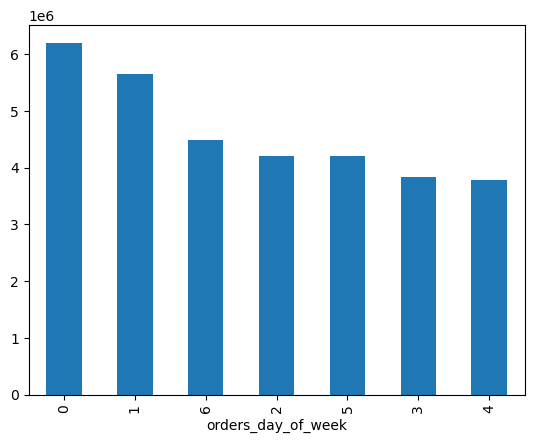

In [30]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

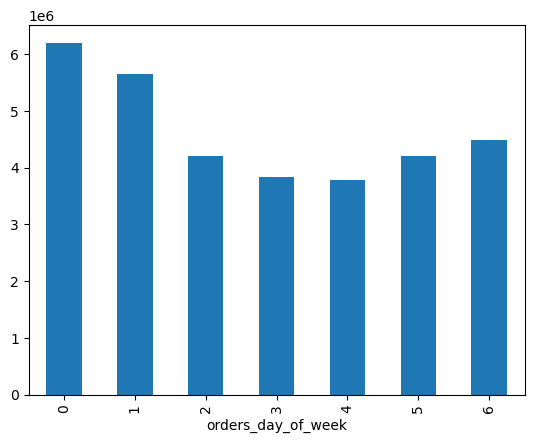

In [31]:
# Using sort_index() to sort bars according to index order instead of largest to smallest
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

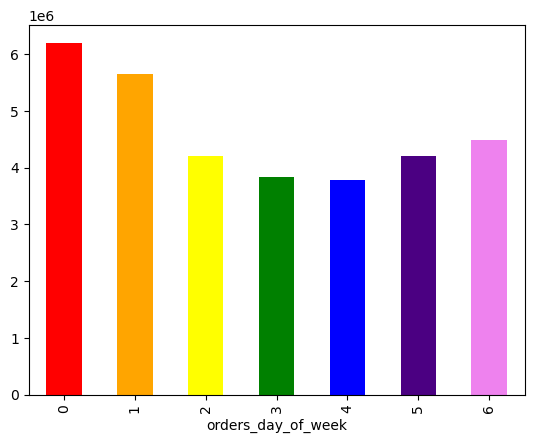

In [32]:
# Adding color argument in plot.bar() function and listing the colors in order

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

### 3. Exporting charts
Save bar chart within bar object, then call upon it using bar.figure.
Export it outside of Jupyter as an image file using figure.savefig() function

In [33]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 4. Creating Histograms

<Axes: ylabel='Frequency'>

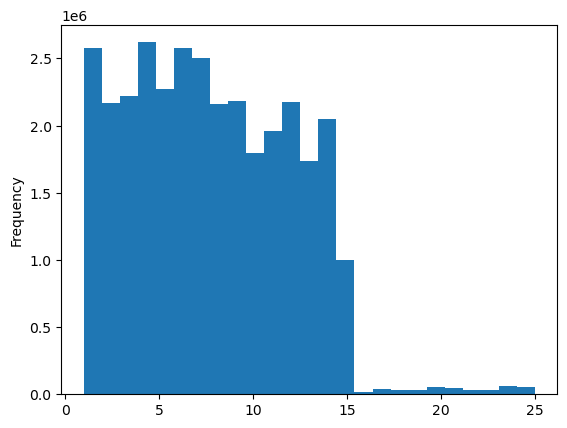

In [34]:
# Creating a histogram for 'prices' variable using .hist() function.

ords_prods_merge['prices'].plot.hist(bins=25)

We see most products are priced between 1 and 15 dollars, with a few items priced at 15 to 25 dollars. 

Let's increase level of granularity to 70 bins.

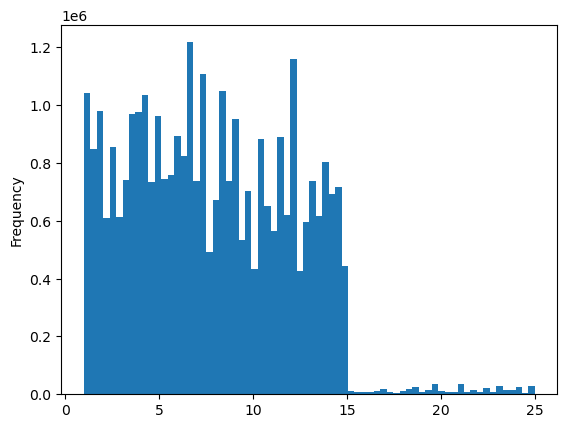

In [42]:
# Storing as hist object

hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [43]:
# Exporting this histogram using method outlined earlier in the exercise.

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_item_prices.png'))

After removing outliers in previous notebook, the scatterplot is what we'd expect.

###  5. Use sns.scatterplot() to create scatterplot

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

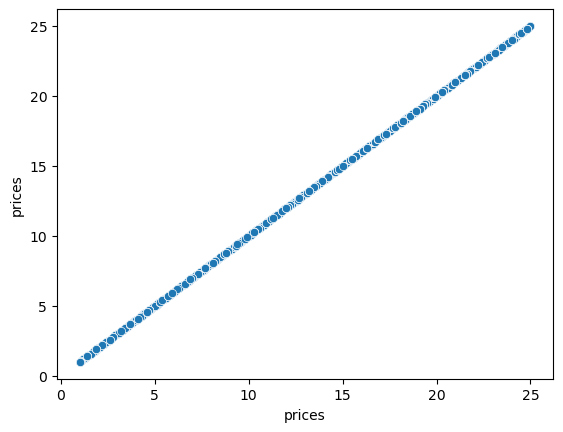

In [7]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

### 6. Creating Line Charts

The lesson takes a detour into sampling data... so we're going to sample first then create a line chart.

In [8]:
# Each seed will generate a reproducible but random sequence. Ya get it??

np.random.seed(8)

In [9]:
#70/30 split

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [10]:
#a list of T/F's the length of rows in ords_prods_merge

dev

array([False, False, False, ...,  True,  True,  True])

Quick demo how random.rand() will take the length of whatever and make that many values between 0 and 1.


In [11]:
np.random.rand(10)

array([0.67155541, 0.11421682, 0.46579626, 0.75124206, 0.64115017,
       0.89070744, 0.65398518, 0.59856105, 0.99791278, 0.09380144])

In [12]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [13]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [14]:
len(ords_prods_merge)

32404859

In [15]:
len(big) + len(small)

32404859

Eureka! The same number of rows!

In [16]:
# Reduce samples to only columns necessary for the chart

df_2 = small[['orders_day_of_week', 'prices']]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

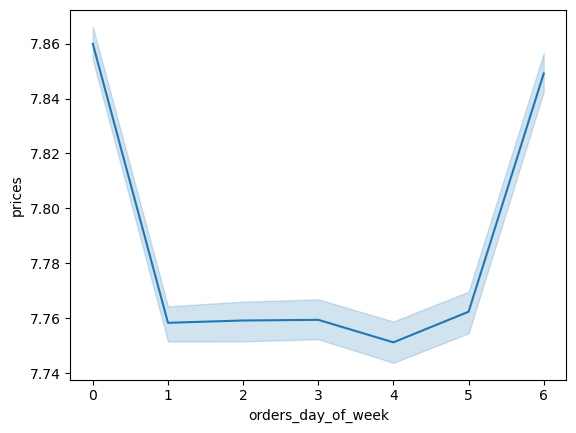

In [17]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [18]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_by_dow.png'))